# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
#libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Your code here

data = pd.read_csv('PS_20174392719_1491204439457_log.csv')
sample = data.sample(n=100000)
data = sample 
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1803499,162,CASH_IN,284351.97,C1686548360,3732306.12,4016658.10,C1684470782,981884.40,697532.43,0,0
3167852,238,CASH_OUT,103041.27,C1134995140,0.00,0.00,C409246190,413313.77,516355.04,0,0
3052019,234,DEBIT,5338.94,C2027636163,145233.00,139894.06,C630992202,204066.35,209405.29,0,0
2056495,181,CASH_OUT,341987.00,C1473511516,37461.00,0.00,C532593878,2605626.72,2947613.72,0,0
3100221,235,CASH_OUT,154164.08,C30135885,77349.00,0.00,C2133500034,532111.43,686275.51,0,0


In [3]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [4]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
data.shape

(100000, 11)

In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,242.998960,1.796534e+05,8.376539e+05,8.587266e+05,1.106512e+06,1.230503e+06,0.001060,0.0
std,141.668986,6.445255e+05,2.904827e+06,2.940391e+06,3.382991e+06,3.642988e+06,0.032541,0.0
min,1.000000,1.270000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.331968e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,237.000000,7.479776e+04,1.419617e+04,0.000000e+00,1.332427e+05,2.163586e+05,0.000000,0.0
75%,334.000000,2.087050e+05,1.072834e+05,1.443899e+05,9.498989e+05,1.116657e+06,0.000000,0.0
max,730.000000,9.244552e+07,3.380425e+07,3.392785e+07,2.754052e+08,2.752770e+08,1.000000,0.0


In [7]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.019790,-0.008658,-0.008448,0.025241,0.023410,0.021053,NaN
amount,0.019790,1.000000,-0.005745,-0.009988,0.271999,0.444877,0.071083,NaN
oldbalanceOrg,-0.008658,-0.005745,1.000000,0.998879,0.071756,0.047930,0.008732,NaN
newbalanceOrig,-0.008448,-0.009988,0.998879,1.000000,0.073514,0.047798,-0.009107,NaN
oldbalanceDest,0.025241,0.271999,0.071756,0.073514,1.000000,0.976474,-0.005312,NaN
newbalanceDest,0.023410,0.444877,0.047930,0.047798,0.976474,1.000000,0.002607,NaN
isFraud,0.021053,0.071083,0.008732,-0.009107,-0.005312,0.002607,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.isFraud.unique() 

array([0, 1])

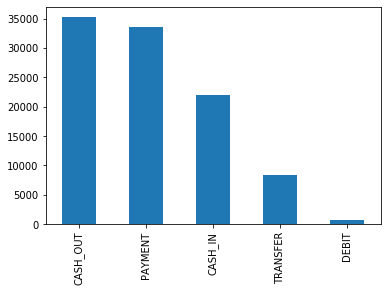

In [9]:
data["type"].value_counts()[:11].plot(kind = "bar")

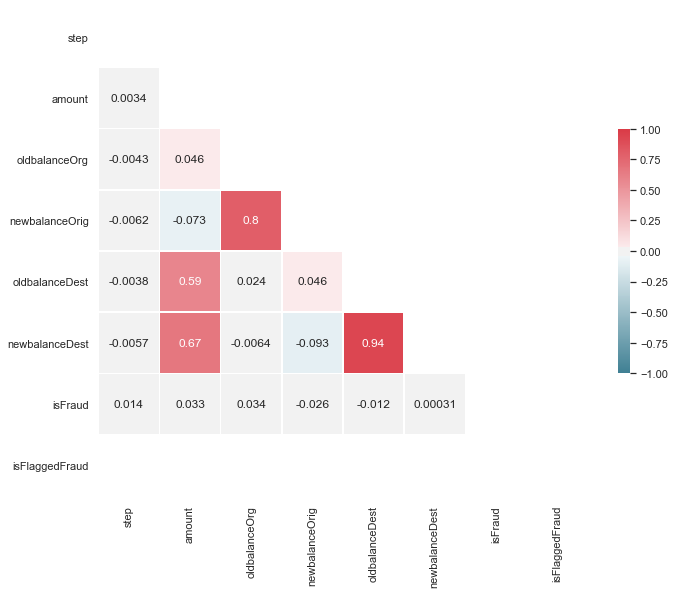

In [10]:
#plot  heatmap

corr = data.corr(method='spearman')


sns.set(style="white")


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})


### What is the distribution of the outcome? 

In [11]:
data['isFraud'].value_counts()

0    99894
1      106
Name: isFraud, dtype: int64

In [12]:
data['isFraud'].value_counts() / len(data['isFraud'])

0    0.99894
1    0.00106
Name: isFraud, dtype: float64

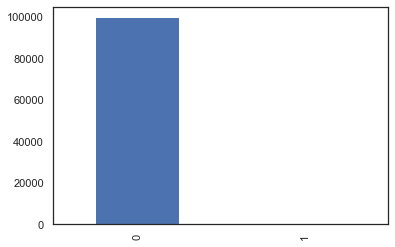

In [13]:
data["isFraud"].value_counts().plot(kind = "bar")

In [14]:
# Your response here

# this distribution looks like realy imbalance

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [15]:
# turn steps into unit = days
data['step'] = (data['step']/24).astype(int)

In [16]:
# let´s drop of useless columns

data = data.drop(columns=['nameOrig','nameDest', 'newbalanceOrig', 'newbalanceDest'])

### Run a logisitc regression classifier and evaluate its accuracy.

In [17]:
#creating dummies
dummy = pd.get_dummies(data)
data = dummy

In [18]:
# Your code here

# lets separate the dataframe 
X = data.drop(['isFraud'], axis =1) # features
y = data['isFraud'] # target

# splitting the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression 

# Initialize model and define hyperparameters
model = LogisticRegression(max_iter=2000)
# max_iter=2000 above avoids error message (max number of interations reached)
# if max number of interations reached, we may not reach the best model
# here we train the model
model.fit(X_train, y_train)


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#predictions: test data
y_pred = model.predict(X_test)
# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(y_pred,y_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(y_pred,y_test))


Confusion matrix
[[19977    23]
 [    0     0]]
-------------------------------------------------------
Accuracy score
0.99885
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.00      0.00      0.00         0

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000



/Users/rafaelmello/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Now pick a model of your choice and evaluate its accuracy.

In [25]:
# Your code here

from sklearn.tree import DecisionTreeClassifier
# initialize the model
dtc = DecisionTreeClassifier()
# fit the model to the training data
dtc.fit(X_train, y_train)



#predictions: test data
y_pred = dtc.predict(X_test)
# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(y_pred,y_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(y_pred,y_test))



Confusion matrix
[[19963    15]
 [   14     8]]
-------------------------------------------------------
Accuracy score
0.99855
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       0.35      0.36      0.36        22

    accuracy                           1.00     20000
   macro avg       0.67      0.68      0.68     20000
weighted avg       1.00      1.00      1.00     20000



In [28]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import ridge_regression
# create an instance of the model
forest = RandomForestClassifier()
# fit the model
forest.fit(X_train, y_train)
# predict for test
y_pred = forest.predict(X_test)
# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test)) # got an error
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(forest.score(X_test,y_test))
#print(accuracy_score(y_pred,y_test)) does the exact same thing as forest.score(X_test,y_test)
#forest.score(X_test,y_test)
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(y_pred,y_test))


Confusion matrix
[[19976    16]
 [    1     7]]
-------------------------------------------------------
Accuracy score
0.99915
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19992
           1       0.30      0.88      0.45         8

    accuracy                           1.00     20000
   macro avg       0.65      0.94      0.73     20000
weighted avg       1.00      1.00      1.00     20000



In [32]:
# let's do some undersampling

from sklearn.utils import resample
# separate input features and target
X = dummy.drop(['isFraud'], axis =1) # features
y = dummy['isFraud'] # target
#split into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
# concatenate training data back together
X = pd.concat([X_train, y_train], axis=1)
# separate majority and minority classes
not_fraud = X[X.isFraud == 0]
fraud = X[X.isFraud == 1]
#downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace=False, # sample without replacemente
                                n_samples=len(fraud), # match minority n
                                random_state=0) #reproducible results
# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])
# check results

downsampled['isFraud'].value_counts()
print(downsampled['isFraud'].value_counts())
# separate input features and target
X = downsampled.drop(['isFraud'], axis =1) # features
y = downsampled['isFraud'] # target
#split into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
# create an instance of the model
forest = RandomForestClassifier()
# fit the model
forest.fit(X_train, y_train)
# predict for test
y_pred = forest.predict(X_test)
# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answers)
print('Accuracy score')
print(forest.score(X_test,y_test))
#print(accuracy_score(y_pred,y_test)) does the exact same thing as forest.score(X_test,y_test)
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(y_pred,y_test))

1    83
0    83
Name: isFraud, dtype: int64
Confusion matrix
[[11  1]
 [ 4 18]]
-------------------------------------------------------
Accuracy score
0.8529411764705882
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.95      0.82      0.88        22

    accuracy                           0.85        34
   macro avg       0.84      0.87      0.85        34
weighted avg       0.87      0.85      0.86        34



### Which model worked better and how do you know?

In [21]:
# Your response here

#the best model is random forrest classifier, but after the downsampling the result of the random forrest classifier inproves a lot  

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.